In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train=pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


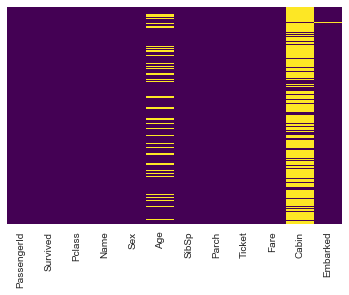

In [8]:
sns.set_style('whitegrid')
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

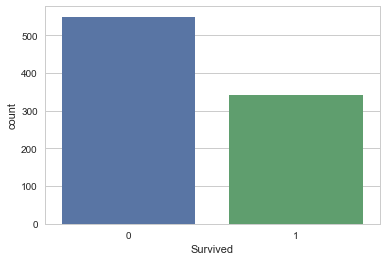

In [9]:
sns.countplot(x='Survived',data=train)

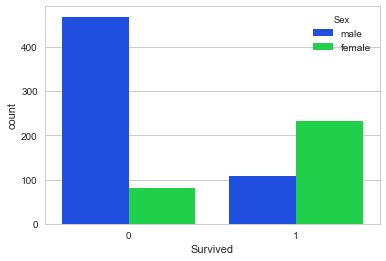

In [11]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='bright')

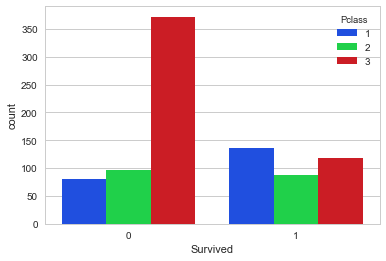

In [12]:
sns.countplot(x='Survived',data=train,hue='Pclass',palette='bright')

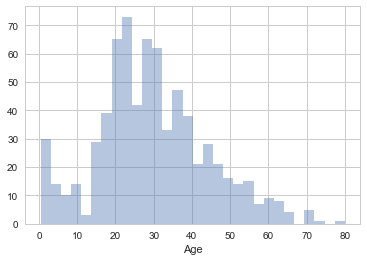

In [17]:
 sns.distplot(train['Age'].dropna(),kde=False,bins=30)

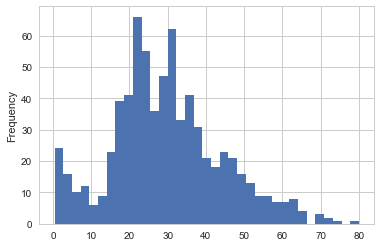

In [18]:
train['Age'].plot.hist(bins=35)

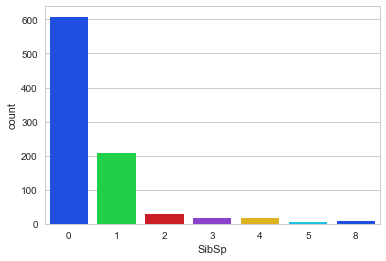

In [20]:
sns.countplot(x='SibSp',data=train,palette='bright')

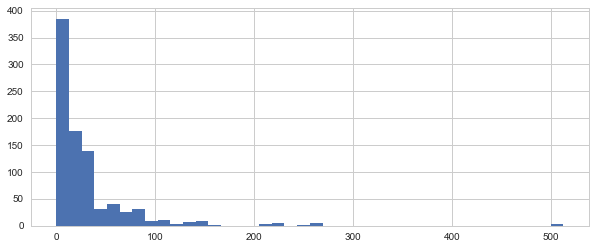

In [21]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [28]:
#let's check with cufflink
import cufflinks as cf

In [29]:
cf.go_offline()
#cf.go_online()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [30]:
train['Fare'].iplot(kind='hist',bins=50)

In [33]:
#Data Cleaning
train[['Age','Pclass']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


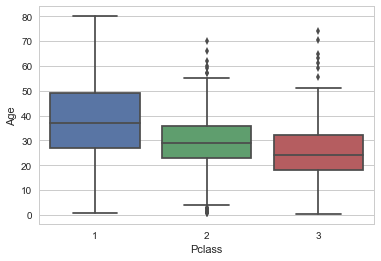

In [35]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [36]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        
        
    

In [37]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

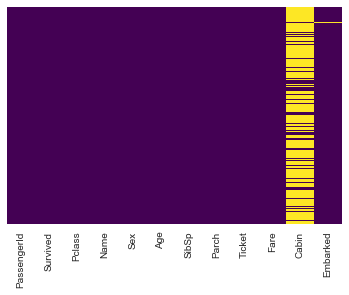

In [38]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
train.drop('Cabin',axis=1,inplace=True)

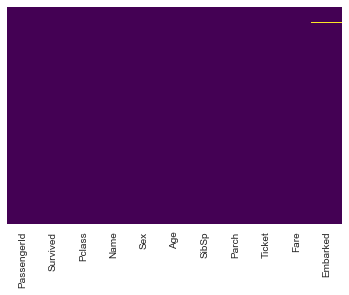

In [41]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
train.dropna(inplace=True)

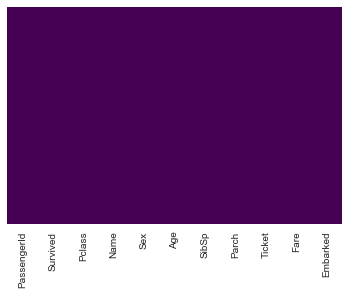

In [43]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [48]:
#clean the Data to fit into our model
sex=pd.get_dummies(train['Sex'],drop_first=True)
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [51]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [53]:
train=pd.concat([train,sex,embarked],axis=1)

In [56]:
train.drop('PassengerId',axis=1,inplace=True)

In [58]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [59]:
X=train.drop('Survived',axis=1)
Y=train['Survived']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=101)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
classifier=LogisticRegression()

In [67]:
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
Y_predict=classifier.predict(X_test)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(Y_test,Y_predict))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(Y_test,Y_predict)

array([[148,  15],
       [ 36,  68]], dtype=int64)